# Load data

In [2]:
import yfinance as yf
df = yf.Ticker("006208.TW").history(period = "10y")
df #檢查用

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-03-26 00:00:00+08:00,24.554639,24.590887,24.554639,24.590887,3000,0.0,0.0,0.0
2014-03-27 00:00:00+08:00,24.641635,24.692383,24.641635,24.692383,92000,0.0,0.0,0.0
2014-03-28 00:00:00+08:00,24.685139,24.714138,24.685139,24.685139,17000,0.0,0.0,0.0
2014-03-31 00:00:00+08:00,24.757637,24.902628,24.721386,24.902628,322000,0.0,0.0,0.0
2014-04-01 00:00:00+08:00,24.902625,24.938875,24.902625,24.938875,46000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-03-20 00:00:00+08:00,90.300003,90.699997,89.599998,89.900002,3989576,0.0,0.0,0.0
2024-03-21 00:00:00+08:00,90.849998,92.050003,90.849998,92.000000,5031863,0.0,0.0,0.0
2024-03-22 00:00:00+08:00,92.000000,92.400002,91.500000,92.050003,4367837,0.0,0.0,0.0


#  Filter Data

In [3]:
df = df.filter(["Close"]) # 過濾需要的Topic
df = df.rename(columns = {"Close": "GT"})
df #檢查用

,GT
Date,
2014-03-26 00:00:00+08:00,24.590887
2014-03-27 00:00:00+08:00,24.692383
2014-03-28 00:00:00+08:00,24.685139
2014-03-31 00:00:00+08:00,24.902628
2014-04-01 00:00:00+08:00,24.938875
...,...
2024-03-20 00:00:00+08:00,89.900002
2024-03-21 00:00:00+08:00,92.000000
2024-03-22 00:00:00+08:00,92.050003


# Visualize data

C:\Users\sunny\AppData\Local\Temp\ipykernel_16912\3973191046.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


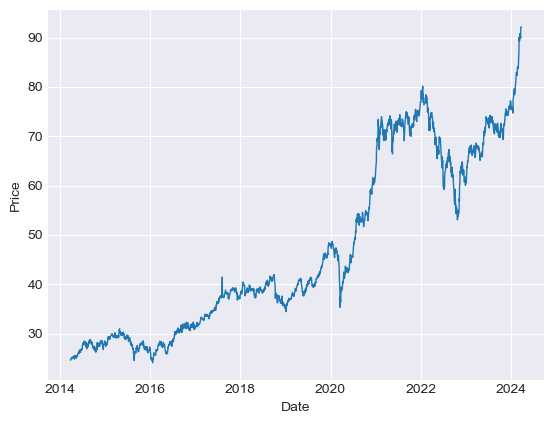

In [4]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["GT"], linewidth = 1)
plt.show()

# Standarize

In [5]:
from sklearn.preprocessing import MinMaxScaler

# 把數據按比例縮小至0~1範圍
scaler=MinMaxScaler(feature_range = (0, 1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.00774416],
       [0.00923375],
       [0.00912743],
       ...,
       [0.99779864],
       [0.99853239],
       [1.        ]])

# Construct datasets

In [6]:
import numpy as np
MOVING_WIN_SIZE = 60 #設定天數

all_x, all_y = [], []
for i in range(len(scaled_prices)-MOVING_WIN_SIZE):
    x=scaled_prices[i:i+MOVING_WIN_SIZE]
    y=scaled_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y)

In [7]:
all_x.shape

(2380, 60, 1)

In [8]:
all_y.shape

(2380, 1)

# Split dataset

In [9]:
DS_SPLIT =0.8
train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y=all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y=all_x[train_ds_size:], all_y[train_ds_size:]

In [10]:
train_x.shape

(1904, 60, 1)

In [11]:
train_y.shape

(1904, 1)

In [12]:
test_x.shape

(476, 60, 1)

In [13]:
test_y.shape

(476, 1)

# Construct model

In [14]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(train_x.shape[1],1
)))

model.add(LSTM(
    units=50,
    return_sequences=False
))

model.add(Dense(
    units=25
))

model.add(Dense(
    units=1
))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor = "val_loss", patience=10, restore_best_weights = True)
model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    callbacks=[callback],
    epochs=1000
)

Epoch 1/1000
48/48 [==============================] - 1s 18ms/step - loss: 4.8817e-05 - val_loss: 1.5807e-04
Epoch 2/1000
48/48 [==============================] - 1s 18ms/step - loss: 4.5121e-05 - val_loss: 4.5514e-04
Epoch 3/1000
48/48 [==============================] - 1s 18ms/step - loss: 3.8309e-05 - val_loss: 1.3405e-04
Epoch 4/1000
48/48 [==============================] - 1s 18ms/step - loss: 3.5077e-05 - val_loss: 1.4062e-04
Epoch 5/1000
48/48 [==============================] - 1s 19ms/step - loss: 3.4446e-05 - val_loss: 1.5841e-04
Epoch 6/1000
48/48 [==============================] - 1s 18ms/step - loss: 3.5151e-05 - val_loss: 1.5017e-04
Epoch 7/1000
48/48 [==============================] - 1s 19ms/step - loss: 3.5381e-05 - val_loss: 3.2142e-04
Epoch 8/1000
48/48 [==============================] - 1s 18ms/step - loss: 3.9185e-05 - val_loss: 1.8728e-04
Epoch 9/1000
48/48 [==============================] - 1s 18ms/step - loss: 3.5935e-05 - val_loss: 2.4327e-04
Epoch 10/1000
48/48

# Evaluate Model

In [81]:
predicts = model.predict(test_x)
predicts

15/15 [==============================] - 0s 6ms/step


array([[0.6922229 ],
       [0.71694577],
       [0.7154079 ],
       [0.6911907 ],
       [0.6814337 ],
       [0.6887199 ],
       [0.69656825],
       [0.6971789 ],
       [0.6902089 ],
       [0.6655066 ],
       [0.6643917 ],
       [0.6417048 ],
       [0.64947724],
       [0.6690646 ],
       [0.6589736 ],
       [0.6593212 ],
       [0.67159224],
       [0.6500476 ],
       [0.6271858 ],
       [0.62461764],
       [0.62767947],
       [0.6032407 ],
       [0.6134365 ],
       [0.6217888 ],
       [0.63434505],
       [0.6471248 ],
       [0.62693244],
       [0.6351776 ],
       [0.63921016],
       [0.62507445],
       [0.63157535],
       [0.6201885 ],
       [0.64358974],
       [0.6723913 ],
       [0.6812002 ],
       [0.6764134 ],
       [0.66231763],
       [0.66852635],
       [0.656416  ],
       [0.6691161 ],
       [0.66722286],
       [0.6568996 ],
       [0.62464935],
       [0.6223264 ],
       [0.6188244 ],
       [0.61739224],
       [0.6061914 ],
       [0.593

In [82]:
predicts=scaler.inverse_transform(predicts)
predicts

array([[71.229065],
       [72.9136  ],
       [72.808815],
       [71.15873 ],
       [70.49392 ],
       [70.99038 ],
       [71.52514 ],
       [71.56675 ],
       [71.091835],
       [69.4087  ],
       [69.33273 ],
       [67.78692 ],
       [68.316505],
       [69.65113 ],
       [68.963554],
       [68.98724 ],
       [69.82335 ],
       [68.35538 ],
       [66.797646],
       [66.62266 ],
       [66.831276],
       [65.1661  ],
       [65.86081 ],
       [66.42991 ],
       [67.285446],
       [68.15623 ],
       [66.78038 ],
       [67.34218 ],
       [67.61694 ],
       [66.65378 ],
       [67.09673 ],
       [66.32086 ],
       [67.91535 ],
       [69.8778  ],
       [70.47801 ],
       [70.15185 ],
       [69.191414],
       [69.614456],
       [68.7893  ],
       [69.65464 ],
       [69.525635],
       [68.82224 ],
       [66.62482 ],
       [66.46654 ],
       [66.22792 ],
       [66.13034 ],
       [65.36715 ],
       [64.52009 ],
       [65.869   ],
       [64.56783 ],


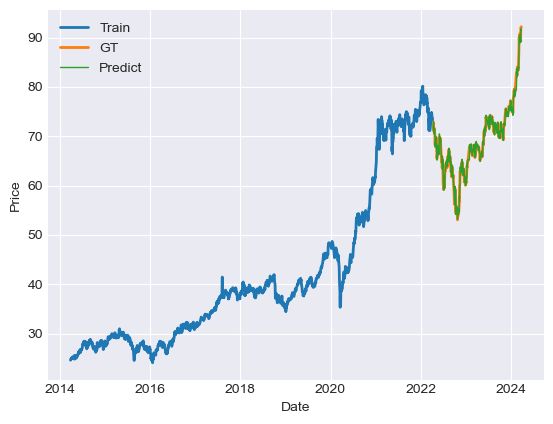

In [83]:
train_df=df[:train_ds_size + MOVING_WIN_SIZE]
test_df=df[train_ds_size+MOVING_WIN_SIZE:]
test_df=test_df.assign(Predict=predicts)

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(train_df["GT"], linewidth=2)
plt.plot(test_df["GT"], linewidth=2)
plt.plot(test_df["Predict"], linewidth=1)
plt.legend(("Train", "GT", "Predict"))
plt.show()

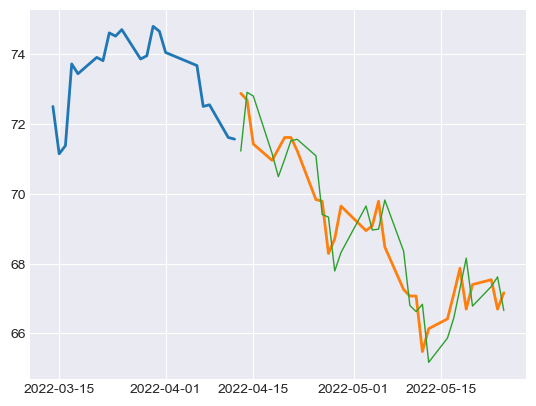

In [86]:
plt.plot(train_df["GT"][-20:], linewidth=2)
plt.plot(test_df["GT"][:30], linewidth=2)
plt.plot(test_df["Predict"][:30], linewidth=1)
plt.show()

In [88]:
test_df=test_df.assign(Shifted=test_df["GT"].shift(1))
test_df.iat[0, -1]=train_df.iat[-1, -1]
test_df

,GT,Predict,Shifted
Date,,,
2022-04-13 00:00:00+08:00,72.884453,71.229065,71.571228
2022-04-14 00:00:00+08:00,72.696861,72.913597,72.884453
2022-04-15 00:00:00+08:00,71.430527,72.808815,72.696861
2022-04-18 00:00:00+08:00,70.961517,71.158730,71.430527
2022-04-19 00:00:00+08:00,71.289818,70.493919,70.961517
...,...,...,...
2024-03-20 00:00:00+08:00,89.900002,89.682106,90.300003
2024-03-21 00:00:00+08:00,92.000000,89.101883,89.900002
2024-03-22 00:00:00+08:00,92.050003,91.803108,92.000000


In [89]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df["GT"], test_df["Predict"], squared = False)
predict_cvrmse = predict_rmse / test_df["GT"].mean() * 100
predict_cvrmse

1.1390370006139623

In [92]:
shifted_rmse = mean_squared_error(test_df["GT"], test_df["Shifted"], squared = False)
shifted_cvrmse = shifted_rmse / test_df["GT"].mean() * 100
shifted_cvrmse

1.076873308421061